## Assignment 3 Q2
Using the 2 results of microchip testing, predict whether the microchip would be able to pass QA using **Logistic Regression** considering the effect of regularization.   
Submitted by: **IEC2016012**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('microchip.txt', names = ['res1', 'res2', 'qa'])
df.head()

,res1,res2,qa
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [3]:
df.shape

(118, 3)

In [4]:
y = df['qa'].values
X = df.drop(['qa'], axis=1).values
print(X.shape, y.shape)

(118, 2) (118,)


In [5]:
msk = np.random.rand(len(X)) < 0.7
X_train = X[msk]
X_test = X[~msk]
y_train = y[msk]
y_test = y[~msk]
print(X_train.shape, X_test.shape)

(85, 2) (33, 2)


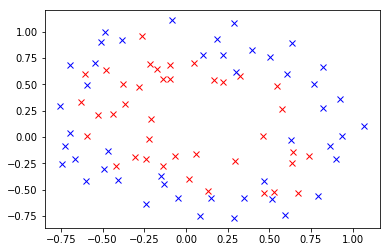

In [6]:
for i in range(X_train.shape[0]):
    if y_train[i]==1:
        plt.plot(X_train[i,0],X_train[i,1],'rx')
    else:
        plt.plot(X_train[i,0],X_train[i,1],'bx')
plt.show()

In [7]:
#Adding row for bias
X_train = np.concatenate( (np.ones((X_train.shape[0],1)),X_train) , axis=1)
X_test = np.concatenate( (np.ones((X_test.shape[0],1)),X_test) , axis=1)
print(X_train.shape)

(85, 3)


In [8]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
def sig_prime(z):
    return sigmoid(z)*(1-sigmoid(z))

In [9]:
m,n = X_train.shape # n is the shape of original_X.shape[0]+1
theta = np.random.rand(1,n)
print(theta)
h = sigmoid(X_train@theta.T)
h = h.reshape(-1)
print(h.shape)

[[0.09530007 0.22981423 0.96488218]]
(85,)


In [10]:
def get_cost(h,y):
    return -(1/m)*(y.T@np.log(1-h) + (1-y).T@np.log(1-h))
# get_cost(h,y)

In [11]:
def gd(X,y,theta,alpha,lam,it):
    i=0
    while(i<it):
        h = sigmoid(X@theta.T).reshape(-1)
        theta = theta - alpha/m*(X.T@(h-y)) - lam/m*np.sum(theta[:,1:])
#         theta = theta*(1-(alpha*lam/m)) - alpha/m*(X.T@(h-y)) 
        i+=1
    return theta

## Without regularization

In [12]:
alphas = [0.0001, 0.001, 0.01, 0.1] #, 1, 10, 100

for alpha in alphas:
    thetax = gd(X_train,y_train,theta,alpha,0,50000) #Regularization=0

    #Testing
    h = sigmoid(X_test@thetax.T)
    h = (h>=0.5)*1
    h = h.reshape(-1)
#     err = np.sum(np.abs(h-y))/y.shape[0]
    acc = np.sum(h==y_test)/y_test.shape[0]
    print("Alpha = " + str(alpha) + ", Accuracy % = " + str(acc))


Alpha = 0.0001, Accuracy % = 0.5454545454545454
Alpha = 0.001, Accuracy % = 0.3939393939393939
Alpha = 0.01, Accuracy % = 0.36363636363636365
Alpha = 0.1, Accuracy % = 0.36363636363636365


## With regularization

In [13]:
alphas = [0.0001, 0.001, 0.01, 0.1] #, 1, 10, 100
lams = [0,0.001,0.01,0.1,1,10]

for lam in lams:
    print("Lambda = " + str(lam))
    for alpha in alphas:
        thetax = gd(X_train,y_train,theta,alpha,lam,50000)
        
        #Testing
        h = sigmoid(X_test@thetax.T)
        h = (h>=0.5)*1
        h = h.reshape(-1)
    #     err = np.sum(np.abs(h-y))/y.shape[0]
        acc = np.sum(h==y_test)/y_test.shape[0]
        print("Alpha = " + str(alpha) + ", Accuracy % = " + str(acc))
    print("--------------------------")

Lambda = 0
Alpha = 0.0001, Accuracy % = 0.5454545454545454
Alpha = 0.001, Accuracy % = 0.3939393939393939
Alpha = 0.01, Accuracy % = 0.36363636363636365
Alpha = 0.1, Accuracy % = 0.36363636363636365
--------------------------
Lambda = 0.001
Alpha = 0.0001, Accuracy % = 0.36363636363636365
Alpha = 0.001, Accuracy % = 0.3939393939393939
Alpha = 0.01, Accuracy % = 0.36363636363636365
Alpha = 0.1, Accuracy % = 0.36363636363636365
--------------------------
Lambda = 0.01
Alpha = 0.0001, Accuracy % = 0.42424242424242425
Alpha = 0.001, Accuracy % = 0.36363636363636365
Alpha = 0.01, Accuracy % = 0.3939393939393939
Alpha = 0.1, Accuracy % = 0.36363636363636365
--------------------------
Lambda = 0.1
Alpha = 0.0001, Accuracy % = 0.3939393939393939
Alpha = 0.001, Accuracy % = 0.3939393939393939
Alpha = 0.01, Accuracy % = 0.36363636363636365
Alpha = 0.1, Accuracy % = 0.3939393939393939
--------------------------
Lambda = 1
Alpha = 0.0001, Accuracy % = 0.3939393939393939
Alpha = 0.001, Accuracy % =

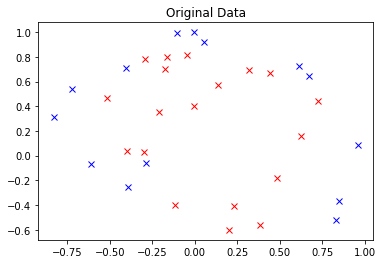

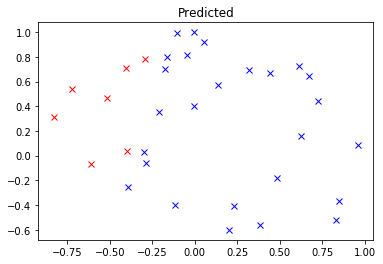

In [14]:
thetax = gd(X_train,y_train,theta,0.01,0.01,50000)

h = sigmoid(X_test@thetax.T)
h = (h>=0.5)*1
h = h.reshape(-1)

def plot_graph(X,y,h):
    mask = y==1
    plt.plot(X[mask,1],X[mask,2],'rx')
    plt.plot(X[~mask,1],X[~mask,2],'bx')
    plt.title("Original Data")
    plt.show()

    mask = h==1
    plt.plot(X[mask,1],X[mask,2],'rx')
    plt.plot(X[~mask,1],X[~mask,2],'bx')
    plt.title('Predicted')
    plt.show()
    
plot_graph(X_test,y_test,h)

# After adding x<sup>2</sup> terms

In [15]:
X_train = np.concatenate( (X_train,X_train[:,1:]**2) , axis=1)
X_test = np.concatenate( (X_test,X_test[:,1:]**2) , axis=1)
print(X_train.shape)

(85, 5)


In [16]:
m,n = X_train.shape # n is the shape of original_X.shape[0]+1
theta = np.random.rand(1,n)
print(theta)
h = sigmoid(X_train@theta.T)
h = h.reshape(-1)
print(h.shape)

[[0.54784304 0.53516494 0.53717152 0.72075084 0.51335911]]
(85,)


## Without regularization

In [17]:
alphas = [0.0001, 0.001, 0.01, 0.1] #, 1, 10, 100

for alpha in alphas:
    thetax = gd(X_train,y_train,theta,alpha,0,50000) #Regularization=0

    #Testing
    h = sigmoid(X_test@thetax.T)
    h = (h>=0.5)*1
    h = h.reshape(-1)
#     err = np.sum(np.abs(h-y))/y.shape[0]
    acc = np.sum(h==y_test)/y_test.shape[0]
    print("Alpha = " + str(alpha) + ", Accuracy % = " + str(acc))


Alpha = 0.0001, Accuracy % = 0.45454545454545453
Alpha = 0.001, Accuracy % = 0.5757575757575758
Alpha = 0.01, Accuracy % = 0.7878787878787878
Alpha = 0.1, Accuracy % = 0.7878787878787878


## With regularization

In [18]:
alphas = [0.0001, 0.001, 0.01, 0.1] #, 1, 10, 100
lams = [0,0.001,0.01,0.1,1,10]

for lam in lams:
    print("Lambda = " + str(lam))
    for alpha in alphas:
        thetax = gd(X_train,y_train,theta,alpha,lam,50000)
        
        #Testing
        h = sigmoid(X_test@thetax.T)
        h = (h>=0.5)*1
        h = h.reshape(-1)
    #     err = np.sum(np.abs(h-y))/y.shape[0]
        acc = np.sum(h==y_test)/y_test.shape[0]
        print("Alpha = " + str(alpha) + ", Accuracy % = " + str(acc))
    print("--------------------------")

Lambda = 0
Alpha = 0.0001, Accuracy % = 0.45454545454545453
Alpha = 0.001, Accuracy % = 0.5757575757575758
Alpha = 0.01, Accuracy % = 0.7878787878787878
Alpha = 0.1, Accuracy % = 0.7878787878787878
--------------------------
Lambda = 0.001
Alpha = 0.0001, Accuracy % = 0.42424242424242425
Alpha = 0.001, Accuracy % = 0.7575757575757576
Alpha = 0.01, Accuracy % = 0.8181818181818182
Alpha = 0.1, Accuracy % = 0.7878787878787878
--------------------------
Lambda = 0.01
Alpha = 0.0001, Accuracy % = 0.3939393939393939
Alpha = 0.001, Accuracy % = 0.6363636363636364
Alpha = 0.01, Accuracy % = 0.7878787878787878
Alpha = 0.1, Accuracy % = 0.8484848484848485
--------------------------
Lambda = 0.1
Alpha = 0.0001, Accuracy % = 0.42424242424242425
Alpha = 0.001, Accuracy % = 0.6363636363636364
Alpha = 0.01, Accuracy % = 0.6363636363636364
Alpha = 0.1, Accuracy % = 0.7878787878787878
--------------------------
Lambda = 1
Alpha = 0.0001, Accuracy % = 0.3939393939393939
Alpha = 0.001, Accuracy % = 0.636

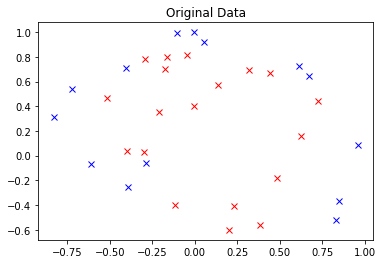

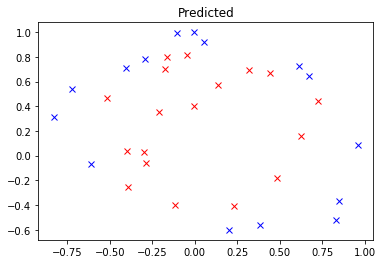

In [20]:
thetax = gd(X_train,y_train,theta,0.1,0.01,50000)

h = sigmoid(X_test@thetax.T)
h = (h>=0.5)*1
h = h.reshape(-1)

def plot_graph(X,y,h):
    mask = y==1
    plt.plot(X[mask,1],X[mask,2],'rx')
    plt.plot(X[~mask,1],X[~mask,2],'bx')
    plt.title("Original Data")
    plt.show()

    mask = h==1
    plt.plot(X[mask,1],X[mask,2],'rx')
    plt.plot(X[~mask,1],X[~mask,2],'bx')
    plt.title('Predicted')
    plt.show()
    
plot_graph(X_test,y_test,h)

## Conclusion

The dataset is plotted on a graph, with $\color{red}{red\ markers}$ indicating that the microchip passed QA and the $\color{blue}{blue\ markers}$ indicating that the microchip didn't pass QA. Then the dataset was *normalized* being a requirement for gradient descent. Then the gradient descent algorithm was applied for different rate of learning rate, $\alpha$ and regularization, $\lambda$.

Without *regularization* the highest *accuracy* was obtained: $78$% at $\alpha=0.01$. Then the regularization was introduced which found that the accuracy increased the accuracy to $84$% indicating the **overfitting** of the data at $\alpha=0.1$ and $\lambda=0.01$.


So it can be seen by plotting the graphs, that the data points are spread in a **circular fashion** and thus require a hypothesis which contains **higher order terms**. Thus after adding square terms, the accuracy improved drastically.   
A suitable set of values could be at:   
    $\alpha$: $0.1$     
    $\lambda$: $0.01$    
    Accuracy: $84.85$%    